# Tutoriel sur Pandas


## 1. Importer pandas
L'étape la plus importante est d'importer les bibliothèques nécessaires:

In [59]:
import pandas as pd
import numpy as np
from pandas import DataFrame,read_csv

## 2. Charger des données

In [60]:
#Emplacement des compteurs avec la correspondance pour les noms dans les fichiers de comptage.
#http://donnees.ville.montreal.qc.ca/dataset/f170fecc-18db-44bc-b4fe-5b0b6d2c7297/resource/c7d0546a-a218-479e-bc9f-ce8f13ca972c/download/localisation_des_compteurs_velo.csv

compteurFichier = './donnees/localisation_des_compteurs_velo.csv'
compteur = pd.read_csv(compteurFichier)

#cars
carsFichier = './donnees/cars.txt'
cars = pd.read_csv(carsFichier, sep=',')


In [61]:
# .head() affiche les 5 premieres lignes seulement
compteur.head()

,ID,Ancien_ID,Nom,Statut,Latitude,Longitude,Annee_implante
0,100041114,NaN,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018.0
1,100002880,10.0,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011.0
2,100003032,3.0,Berri1,Actif,45.516216,-73.562970,2010.0
3,100003034,6.0,Rachel / Papineau_VAS_DirectionOuestSeulement,Unidirectionnel,45.530448,-73.569540,2007.0
4,100003039,5.0,Maisonneuve_2_EnMaintenance,En maintenance,45.500507,-73.574970,2008.0


### 2.1 Charger des colonnes spécifiques

In [62]:
colonnes_selectionnees = ['Nom', 'Statut']
compteur = pd.read_csv(compteurFichier, sep=",", usecols = colonnes_selectionnees)
compteur.head()

,Nom,Statut
0,Eco-Display Parc Stanley,Actif
1,Pont Jacques-Cartier,Actif
2,Berri1,Actif
3,Rachel / Papineau_VAS_DirectionOuestSeulement,Unidirectionnel
4,Maisonneuve_2_EnMaintenance,En maintenance


### 2.2 Charger une colonne en index
L'**index** est comme une adresse, il permet d'accéder à un point de données de la DataFrame ou de la série. Les lignes et les colonnes ont toutes deux des index: les index des lignes sont appelés index tandis que pour les colonnes ce sont ses noms de colonnes.

In [63]:
# mettre les noms des compteurs en index
compteur = pd.read_csv(compteurFichier, index_col = 0)
compteur.head()

,Ancien_ID,Nom,Statut,Latitude,Longitude,Annee_implante
ID,,,,,,
100041114,NaN,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018.0
100002880,10.0,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011.0
100003032,3.0,Berri1,Actif,45.516216,-73.562970,2010.0
100003034,6.0,Rachel / Papineau_VAS_DirectionOuestSeulement,Unidirectionnel,45.530448,-73.569540,2007.0
100003039,5.0,Maisonneuve_2_EnMaintenance,En maintenance,45.500507,-73.574970,2008.0


Dans cet exemple, en chargant la colonne 'ID' en index, cela permet de faciliter l'accès aux données selon le numéro du ID.

In [64]:
#acceder a une ligne particuliere
compteur.loc[100035409]

Ancien_ID                                         NaN
Nom               Christophe-Colomb_PisteEnSitePropre
Statut                                          Actif
Latitude                                      45.5577
Longitude                                    -73.6466
Annee_implante                                   2017
Name: 100035409, dtype: object

### 2.3 Charger une colonne dans un type particulier


In [72]:
#types de donnees original de chaque colonne
compteur.dtypes

Ancien_ID         float64
Nom                object
Statut             object
Latitude          float64
Longitude         float64
Annee_implante    float64
dtype: object

In [75]:
#charger la colonne Ancien_ID en string (object)
dtypes = {"Ancien_ID":"str"}
nouveauCompteur = pd.read_csv(compteurFichier, sep=',', dtype=dtypes)

In [76]:
nouveauCompteur.dtypes

ID                  int64
Ancien_ID          object
Nom                object
Statut             object
Latitude          float64
Longitude         float64
Annee_implante    float64
dtype: object

## 3. Charger un fichier sans header

In [9]:
fichierNoHead = './donnees/localisation_des_compteurs_velo_noheader.csv'
noHead = pd.read_csv(fichierNoHead, sep=';', header=None)
noHead.head()

,0,1,2,3,4,5,6
0,100041114,NaN,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018.0
1,100002880,10.0,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011.0
2,100003032,3.0,Berri1,Actif,45.516216,-73.562970,2010.0
3,100003034,6.0,Rachel / Papineau_VAS_DirectionOuestSeulement,Unidirectionnel,45.530448,-73.569540,2007.0
4,100003039,5.0,Maisonneuve_2_EnMaintenance,En maintenance,45.500507,-73.574970,2008.0


### 3.1 Fournir un header
* Avec `names`
* Avec `.columns`
* Avec `.rename()`

In [10]:
#avec names
noHead = pd.read_csv(fichierNoHead, sep=';', header=None, names = ['ID', 'Ancien ID', 'Nom', 'Statut', 'Latitude', 'Longitude', 'Annee implantee'])
noHead.head()

,ID,Ancien ID,Nom,Statut,Latitude,Longitude,Annee implantee
0,100041114,NaN,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018.0
1,100002880,10.0,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011.0
2,100003032,3.0,Berri1,Actif,45.516216,-73.562970,2010.0
3,100003034,6.0,Rachel / Papineau_VAS_DirectionOuestSeulement,Unidirectionnel,45.530448,-73.569540,2007.0
4,100003039,5.0,Maisonneuve_2_EnMaintenance,En maintenance,45.500507,-73.574970,2008.0


In [11]:
# avec .columns
noHead.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
noHead.head()

,A,B,C,D,E,F,G
0,100041114,NaN,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018.0
1,100002880,10.0,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011.0
2,100003032,3.0,Berri1,Actif,45.516216,-73.562970,2010.0
3,100003034,6.0,Rachel / Papineau_VAS_DirectionOuestSeulement,Unidirectionnel,45.530448,-73.569540,2007.0
4,100003039,5.0,Maisonneuve_2_EnMaintenance,En maintenance,45.500507,-73.574970,2008.0


In [12]:
# avec .rename()
nom = pd.DataFrame({"ID": [100041114, 100002880, 100003032], "Ancien_ID": ["NaN", 10.0, 3.0], "Nom": ["Eco-Display Parc Stanley", "Pont Jacques-Cartier", "Berri"]})
# Ancien_ID à Ancien ID
nom.rename(columns={"Ancien_ID": "Ancien ID"})

,ID,Ancien ID,Nom
0,100041114,NaN,Eco-Display Parc Stanley
1,100002880,10,Pont Jacques-Cartier
2,100003032,3,Berri


In [13]:
nom[:3].rename(index={0: "Premier", 1: "Deuxieme", 2: "Troisieme"})

,ID,Ancien_ID,Nom
Premier,100041114,NaN,Eco-Display Parc Stanley
Deuxieme,100002880,10,Pont Jacques-Cartier
Troisieme,100003032,3,Berri


In [14]:
nom[:3].rename(str.lower, axis='columns')

,id,ancien_id,nom
0,100041114,NaN,Eco-Display Parc Stanley
1,100002880,10,Pont Jacques-Cartier
2,100003032,3,Berri


In [15]:
nom[:3].rename({0: 1, 1: 2, 2: 3}, axis='index')

,ID,Ancien_ID,Nom
1,100041114,NaN,Eco-Display Parc Stanley
2,100002880,10,Pont Jacques-Cartier
3,100003032,3,Berri


## 4. Convertir des data types
Un type de donnée est essentiellement une construction interne qu'un langage de programmation utilise pour comprendre comment stocker et manipuler des données.

Les types de données de `pandas` sont:
* object
* int64
* float64: 
* bool
* datetime64
* timedelta[ns]
* category

### 4.1 Convertir avec `astype()`

In [17]:
# convertir la colonne Annee_implante de float64 a int32
compteur = compteur.fillna(0) #remplacer les NaN en 0
compteur = compteur.astype({"Annee_implante": int})
compteur = compteur.astype({"Ancien_ID": int})
compteur.head()

,Ancien_ID,Nom,Statut,Latitude,Longitude,Annee_implante
ID,,,,,,
100041114,0,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018
100002880,10,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011
100003032,3,Berri1,Actif,45.516216,-73.562970,2010
100003034,6,Rachel / Papineau_VAS_DirectionOuestSeulement,Unidirectionnel,45.530448,-73.569540,2007
100003039,5,Maisonneuve_2_EnMaintenance,En maintenance,45.500507,-73.574970,2008


### 4.2 Convertir avec les fonctions de pandas

In [18]:
#convertir en numerique
serie = pd.Series(['1.0', '2', -3])
pd.to_numeric(serie)

0    1.0
1    2.0
2   -3.0
dtype: float64

In [19]:
#convertir en datetime
date = pd.DataFrame({'day': [20, 21], 'month': [6, 7], 'year': [2019, 2020]})
pd.to_datetime(date)

0   2019-06-20
1   2020-07-21
dtype: datetime64[ns]

## 5. Sélectionner des données

### 5.1 Adresser une colonne avec une chaîne de caractère
* Avec les crochets `[]`
* Avec le point `.`

In [20]:
#annee implantee de chaque compteur selon le ID
compteur['Annee_implante']

ID
100041114    2018
100002880    2011
100003032    2010
100003034    2007
100003039    2008
100003040    2010
100003041    2010
100003042    2010
100004575    2009
100007390    2013
100011747    2013
100011748    2013
100011783    2013
100012217    2013
100012218    2013
100017441    2013
100017523    2014
100025474    2016
100034805    2017
100035408    2017
100035409    2017
100041101    2017
100001753    2013
100047030       0
100052600    2019
100052601    2019
100052602    2019
100052603    2019
100052604    2019
100052605    2019
100052606    2019
100053055    2019
100053057    2019
100053058    2019
100053059    2019
100053210    2019
100054073    2019
100055268    2020
100056188    2019
100057050    2019
100057051    2019
100057052    2019
100057053    2019
100057500    2008
38           2015
39           2015
Name: Annee_implante, dtype: int32

In [21]:
compteur.Annee_implante

ID
100041114    2018
100002880    2011
100003032    2010
100003034    2007
100003039    2008
100003040    2010
100003041    2010
100003042    2010
100004575    2009
100007390    2013
100011747    2013
100011748    2013
100011783    2013
100012217    2013
100012218    2013
100017441    2013
100017523    2014
100025474    2016
100034805    2017
100035408    2017
100035409    2017
100041101    2017
100001753    2013
100047030       0
100052600    2019
100052601    2019
100052602    2019
100052603    2019
100052604    2019
100052605    2019
100052606    2019
100053055    2019
100053057    2019
100053058    2019
100053059    2019
100053210    2019
100054073    2019
100055268    2020
100056188    2019
100057050    2019
100057051    2019
100057052    2019
100057053    2019
100057500    2008
38           2015
39           2015
Name: Annee_implante, dtype: int32

### 5.2 Sélectionner une donnée selon un critère

In [22]:
#selectionner les donnees apres 2010
compteur[compteur.Annee_implante>=2010]

,Ancien_ID,Nom,Statut,Latitude,Longitude,Annee_implante
ID,,,,,,
100041114,0,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018
100002880,10,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011
100003032,3,Berri1,Actif,45.516216,-73.562970,2010
100003040,12,Pierre-Dupuy,Actif,45.501270,-73.544410,2010
100003041,8,CSC (Côte Sainte-Catherine)_EnMaintenance,En maintenance,45.514900,-73.607506,2010
100003042,22,Parc,Actif,45.513850,-73.581510,2010
100007390,37,Eco-Display - Métro Laurier,Actif,45.527772,-73.588832,2013
100011747,14,Saint-Antoine,Actif,45.506250,-73.557785,2013
100011748,36,René-Lévesque_EnMaintenance,En maintenance,45.516968,-73.554040,2013


In [23]:
# plusieurs conditions
critere1 = compteur['Ancien_ID'] > 0
critere2 = compteur['Annee_implante'] > 2010

In [24]:
compteur['Ancien_ID']>0

ID
100041114    False
100002880     True
100003032     True
100003034     True
100003039     True
100003040     True
100003041     True
100003042     True
100004575     True
100007390     True
100011747     True
100011748     True
100011783     True
100012217     True
100012218     True
100017441     True
100017523     True
100025474    False
100034805    False
100035408    False
100035409    False
100041101    False
100001753     True
100047030     True
100052600    False
100052601    False
100052602    False
100052603    False
100052604    False
100052605    False
100052606    False
100053055    False
100053057    False
100053058    False
100053059    False
100053210    False
100054073    False
100055268    False
100056188    False
100057050    False
100057051    False
100057052    False
100057053    False
100057500     True
38            True
39            True
Name: Ancien_ID, dtype: bool

In [25]:
compteur[critere1].dtypes

Ancien_ID           int32
Nom                object
Statut             object
Latitude          float64
Longitude         float64
Annee_implante      int32
dtype: object

In [26]:
tout_critere = critere1 & critere2
compteur[tout_critere]

,Ancien_ID,Nom,Statut,Latitude,Longitude,Annee_implante
ID,,,,,,
100002880,10,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011
100007390,37,Eco-Display - Métro Laurier,Actif,45.527772,-73.588832,2013
100011747,14,Saint-Antoine,Actif,45.506250,-73.557785,2013
100011748,36,René-Lévesque_EnMaintenance,En maintenance,45.516968,-73.554040,2013
100011783,17,Maisonneuve_3,Actif,45.470493,-73.609566,2013
100012217,23,Rachel / HôteldeVille_VAS_DirectionOuestSeulement,Unidirectionnel,45.519620,-73.580250,2013
100012218,29,Boyer,Actif,45.533650,-73.594590,2013
100017441,7,University,Actif,45.506134,-73.575870,2013
100017523,1,Saint-Urbain,Actif,45.519395,-73.588663,2014


In [27]:
# condition avec "et" (&)
compteur[(compteur['Statut']=='Actif') & (compteur['Annee_implante']==2019)]

,Ancien_ID,Nom,Statut,Latitude,Longitude,Annee_implante
ID,,,,,,
100052601,0,Pont Ile Bizard,Actif,45.486222,-73.866064,2019
100052602,0,Pont Le Gardeur,Actif,45.700896,-73.483252,2019
100052603,0,Piste Des Carrières,Actif,45.534160,-73.591464,2019
100052604,0,Estacade,Actif,45.466751,-73.533825,2019
100052605,0,Notre Dame 3 (Bellerive),Actif,45.591929,-73.510007,2019
100052606,0,Bennett,Actif,45.555084,-73.538819,2019
100053055,0,Sainte-Croix,Actif,45.511742,-73.672531,2019
100053059,0,Valois,Actif,45.546844,-73.542388,2019
100053210,0,Souligny,Actif,45.595538,-73.520435,2019


In [28]:
#retourne les années implantées > 2015 ou (|) tout les ancien ID > 0
compteur[(compteur['Annee_implante'] > 2015) | (compteur['Ancien_ID'] > 0)].head()

,Ancien_ID,Nom,Statut,Latitude,Longitude,Annee_implante
ID,,,,,,
100041114,0,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018
100002880,10,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011
100003032,3,Berri1,Actif,45.516216,-73.562970,2010
100003034,6,Rachel / Papineau_VAS_DirectionOuestSeulement,Unidirectionnel,45.530448,-73.569540,2007
100003039,5,Maisonneuve_2_EnMaintenance,En maintenance,45.500507,-73.574970,2008


## 6. Utiliser l'index

In [29]:
compteur[:3]

,Ancien_ID,Nom,Statut,Latitude,Longitude,Annee_implante
ID,,,,,,
100041114,0,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018
100002880,10,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011
100003032,3,Berri1,Actif,45.516216,-73.562970,2010


In [30]:
compteur[5::-1]

,Ancien_ID,Nom,Statut,Latitude,Longitude,Annee_implante
ID,,,,,,
100003040,12,Pierre-Dupuy,Actif,45.501270,-73.544410,2010
100003039,5,Maisonneuve_2_EnMaintenance,En maintenance,45.500507,-73.574970,2008
100003034,6,Rachel / Papineau_VAS_DirectionOuestSeulement,Unidirectionnel,45.530448,-73.569540,2007
100003032,3,Berri1,Actif,45.516216,-73.562970,2010
100002880,10,Pont Jacques-Cartier,Actif,45.525508,-73.554422,2011
100041114,0,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018


## 7. Charger les statistiques

In [31]:
cars.head()

,Country,Car,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
0,U.S.,Buick Estate Wagon,16.9,4.360,2.73,155,350,8
1,U.S.,Ford Country Squire Wagon,15.5,4.054,2.26,142,351,8
2,U.S.,Chevy Malibu Wagon,19.2,3.605,2.56,125,267,8
3,U.S.,Chrysler LeBaron Wagon,18.5,3.940,2.45,150,360,8
4,U.S.,Chevette,30.0,2.155,3.70,68,98,4


In [32]:
# moyenne
cars['Weight'].mean()

2.862894736842105

In [33]:
# mediane
cars[['Drive_Ratio', 'Horsepower']].median()

Drive_Ratio      3.08
Horsepower     100.00
dtype: float64

La fonction Pandas `dataframe.quantile()` renvoie des valeurs au quantile donné sur l'axe demandé.

`DataFrame.quantile(q=0.5, axis=0, numeric_only=True, interpolation=’linear’)`

In [34]:
# quantile
cars['Weight'].quantile()

2.685

In [35]:
# trouver les quantiles sur l'axe d'index
cars.quantile([.1, .25, .5, .75], axis=0)

,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
0.10,16.970,2.0110,2.438,68.70,90.4,4.0
0.25,18.525,2.2075,2.695,78.50,105.0,4.0
0.50,24.250,2.6850,3.080,100.00,148.5,4.5
0.75,30.375,3.4100,3.625,123.75,229.5,6.0


In [36]:
# std
cars['Horsepower'].std()

26.444929223767478

In [37]:
# describe
cars[['Drive_Ratio', 'Horsepower', 'Displacement', 'Cylinders']].describe()

,Drive_Ratio,Horsepower,Displacement,Cylinders
count,38.000000,38.000000,38.000000,38.000000
mean,3.093421,101.736842,177.289474,5.394737
std,0.517657,26.444929,88.876747,1.603029
min,2.260000,65.000000,85.000000,4.000000
25%,2.695000,78.500000,105.000000,4.000000
50%,3.080000,100.000000,148.500000,4.500000
75%,3.625000,123.750000,229.500000,6.000000
max,3.900000,155.000000,360.000000,8.000000


In [38]:
cars[['Country']].describe()

,Country
count,38
unique,6
top,U.S.
freq,22


## 8. Groupby
La fonction Pandas `dataframe.groupby()` est utilisée pour diviser les données en groupes en fonction de certains critères. Les objets pandas peuvent être divisés sur n'importe quels axes. La définition abstraite du regroupement est de fournir un "mapping" des étiquettes aux noms de groupe.

In [39]:
# aggregation
cars.agg({'MPG': ['min', 'max', 'median', 'skew'], 'Weight': ['min', 'max', 'median', 'mean']})

,MPG,Weight
max,37.300000,4.360000
mean,NaN,2.862895
median,24.250000,2.685000
min,15.500000,1.915000
skew,0.196782,NaN


In [40]:
# groupby
cars[['Country', 'MPG']].groupby('Country').mean()

,MPG
Country,
France,16.200000
Germany,27.140000
Italy,37.300000
Japan,29.600000
Sweden,19.300000
U.S.,22.995455


In [41]:
groupe = cars.groupby('Car')
groupe.aggregate(np.sum)

,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
Car,,,,,,
AMC Concord D/L,18.1,3.410,2.73,120,258,6
AMC Spirit,27.4,2.670,3.08,80,121,4
Audi 5000,20.3,2.830,3.90,103,131,5
BMW 320i,21.5,2.600,3.64,110,121,4
Buick Century Special,20.6,3.380,2.73,105,231,6
Buick Estate Wagon,16.9,4.360,2.73,155,350,8
Buick Skylark,28.4,2.670,2.53,90,151,4
Chevette,30.0,2.155,3.70,68,98,4
Chevy Caprice Classic,17.0,3.840,2.41,130,305,8


In [42]:
groupe = cars.groupby('Country')
groupe['Weight'].agg([np.max, np.min, np.mean, np.sum, np.std])

,amax,amin,mean,sum,std
Country,,,,,
France,3.410,3.410,3.410000,3.410,NaN
Germany,2.830,1.925,2.307000,11.535,0.393535
Italy,2.130,2.130,2.130000,2.130,NaN
Japan,2.815,1.915,2.245714,15.720,0.334582
Sweden,3.140,2.795,2.967500,5.935,0.243952
U.S.,4.360,2.155,3.184545,70.060,0.682818


## 9. Sauvegarder des données en CSV

In [43]:
data = pd.DataFrame({'Veh leger': [1, 2], 'Veh lourd': [5, 10], 'TC': [8, 10], 'Pietons': [2, 3]})
data.to_csv('fichierDonnees1.csv', index=False, sep='\t')

## Créer des graphiques avec `matplotlib`
`matplotlib` est une bibliothèque qui sert à tracer à visualiser des données sous formes de graphiques. Par exemple, il est possible de créer des graphiques avec les dataframes de pandas.

Les **dataframes** en Python sont très similaires à ceux dans R: ils sont fournis avec la bibliothèque `pandas` et ils sont définis comme des structures de données étiquetées bidimensionnelles avec des colonnes de types différents.

In [44]:
import matplotlib.pyplot as plt

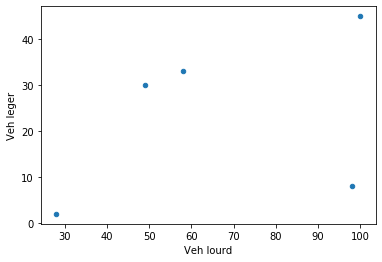

In [45]:
#creation d'un dataframe
df = pd.DataFrame({
    'Heures': ['8:00AM', '9:00AM', '10:00AM', '11:00AM', '12:00PM'],
    'Veh lourd': [28, 98, 100, 49, 58],
    'Veh leger': [2, 8, 45, 30, 33],
    'Pietons': [3, 5, 9, 11, 21]
})

#nuage de point 'scatter'
df.plot(kind='scatter', x='Veh lourd', y='Veh leger')

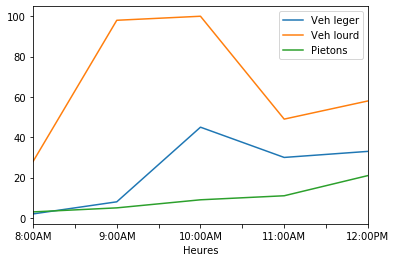

In [46]:
ax = plt.gca() 
df.plot(kind='line', x='Heures', y='Veh leger', ax= ax)
df.plot(kind='line', x='Heures', y='Veh lourd', ax= ax)
df.plot(kind='line', x='Heures', y='Pietons', ax= ax)


plt.show()

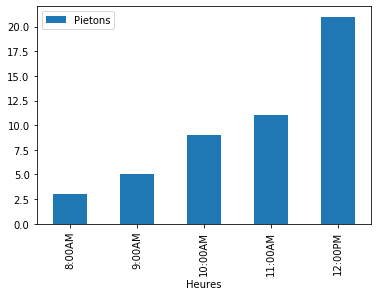

In [47]:
#diagramme a bar
df.plot(kind='bar', x='Heures', y='Pietons')

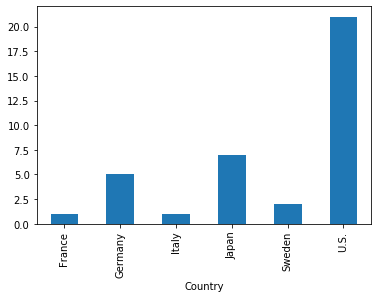

In [48]:
#diagramme a bar avec groupby
cars.groupby('Country')['Weight'].nunique().plot(kind='bar')
plt.show()

Pour en savoir plus sur `matplotlib.pyplot.plot` : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot